## App Ratings Prediction

In [1]:
## Importing required libraries
import numpy as np
import pandas as pd
import os

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler


from sklearn.model_selection import cross_val_score,GridSearchCV

# to build the models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# to evaluate the models
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn import metrics

#To impute missing values
from sklearn.impute import SimpleImputer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/content/googleplaystore.csv') ## Loading Data

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data['Category'].nunique()

34

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
print("Dimensions of Data are ")
print("Total Records : ",data.shape[0])
print("columns : ",data.shape[1])

Dimensions of Data are 
Total Records :  10841
columns :  13


#### Checking for missing data

In [7]:
print("All attributes with no. of missing value in data : ")
null_values = pd.DataFrame({'total_missing': data.isnull().sum(), '%_missing': data.isnull().mean()*100,
                           'datatype':data.dtypes})
null_values

All attributes with no. of missing value in data : 


,total_missing,%_missing,datatype
App,0,0.000000,object
Category,0,0.000000,object
Rating,1474,13.596532,float64
Reviews,0,0.000000,object
Size,0,0.000000,object
Installs,0,0.000000,object
Type,1,0.009224,object
Price,0,0.000000,object
Content Rating,1,0.009224,object
Genres,0,0.000000,object


#### As the target variable is having missing values we can drop those observation as there is no significance in using that data for analysis

In [8]:
data.dropna(axis=0,inplace=True)    ## Dropping the missing values

In [9]:
print("All attributes with no. of missing value in data : ")
null_values = pd.DataFrame({'total_missing': data.isnull().sum(), '%_missing': data.isnull().mean()*100,
                           'datatype':data.dtypes})
null_values

All attributes with no. of missing value in data : 


,total_missing,%_missing,datatype
App,0,0.0,object
Category,0,0.0,object
Rating,0,0.0,float64
Reviews,0,0.0,object
Size,0,0.0,object
Installs,0,0.0,object
Type,0,0.0,object
Price,0,0.0,object
Content Rating,0,0.0,object
Genres,0,0.0,object


In [10]:
print("Dimensions of Data after removal of Null values ")
print("Total Records : ",data.shape[0])
print("columns : ",data.shape[1])

Dimensions of Data after removal of Null values 
Total Records :  9360
columns :  13


From the data it is know that the attributes reviews,Size and intalls are categorical, but those attributes are to be numerical.
Necessary cleaning of data is to be done to make those columns to numerical.

In [11]:
data['Reviews'] = data['Reviews'].astype('float64') 

In size attribute some of the values are in both mb and kb  converting them all in to same units.

#### Cleaning of size column

In [12]:
k=[]
for i in data["Size"]:
    k.append(i.replace("Varies with device","0M"))
data["Size"] = k

In [13]:
k = []
for i in data['Size']:
    if i[-1] == 'k':
        k.append(float(i[:-1])/1024)
    else:
        k.append(float(i[:-1]))
data['Size']= k

#### Cleaning of Installs Column

In [14]:
data['Installs'] = data['Installs'].apply(lambda x: x.split('+')[0])

In [15]:
k=[]
for i in data["Installs"]:
    k.append(int(i.replace(",","")))
data['Installs'] = k

#### Cleaning of Price attribute

In [16]:
data['Price'] = data['Price'].apply(lambda x: float(x) if x =='0' else float(x.split('$')[1]))

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1023.8+ KB


In [18]:
k=[]
for i in data["Android Ver"]:
    k.append(i.replace("Varies with device","0"))
data["Android Ver"] = k

In [19]:
num = ['Rating','Reviews','Size','Installs','Price']  ## Numerical attributes in our dataset

#### Basic statistics for the Numerical data

In [20]:
data.describe()

,Rating,Reviews,Size,Installs,Price
count,9360.000000,9.360000e+03,9360.000000,9.360000e+03,9360.000000
mean,4.191838,5.143767e+05,18.952803,1.790875e+07,0.961279
std,0.515263,3.145023e+06,23.018767,9.126637e+07,15.821640
min,1.000000,1.000000e+00,0.000000,1.000000e+00,0.000000
25%,4.000000,1.867500e+02,2.400000,1.000000e+04,0.000000
50%,4.300000,5.955000e+03,9.500000,5.000000e+05,0.000000
75%,4.500000,8.162750e+04,27.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


#### Exploratory Data Analysis

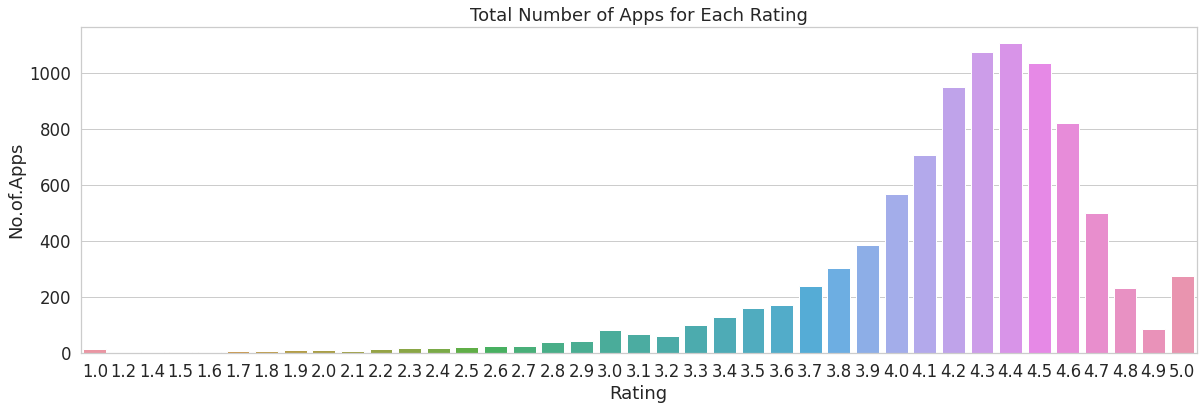

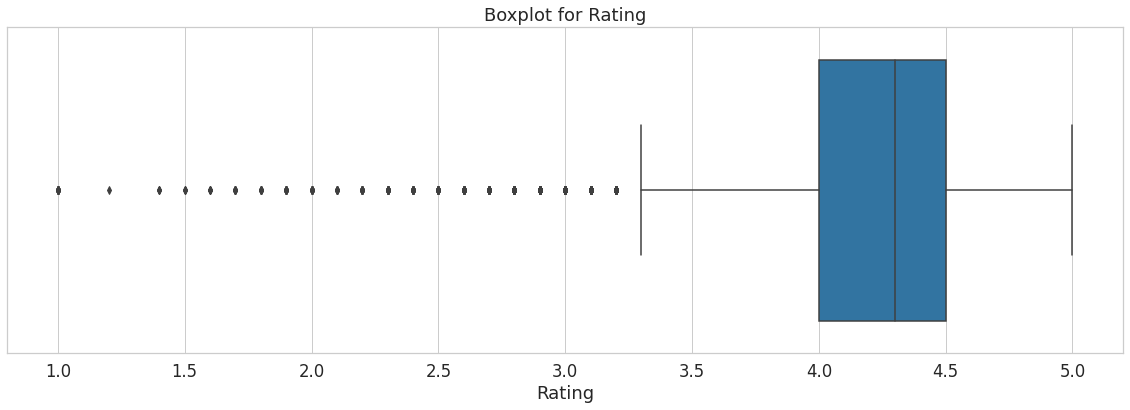

In [21]:
plt.figure(figsize = (20,6))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.5);
sns.countplot(data['Rating']);
plt.ylabel("No.of.Apps")
plt.title("Total Number of Apps for Each Rating");

plt.figure(figsize = (20,6))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.5);
sns.boxplot(data['Rating']);
plt.title("Boxplot for Rating");

1. 50% of the data are having app ratings between 4-4.5

In [22]:
print("Total poor rating apps :",len(data[data['Rating']<3.5]))   ## Poor Rating
data[data['Rating']<3.5]

Total poor rating apps : 732


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
87,RST - Sale of cars on the PCT,AUTO_AND_VEHICLES,3.2,250.0,1.100000,100000,Free,0.0,Everyone,Auto & Vehicles,"April 27, 2018",1.4,4.0.3 and up
159,Cloud of Books,BOOKS_AND_REFERENCE,3.3,1862.0,19.000000,1000000,Free,0.0,Everyone,Books & Reference,"April 27, 2018",2.2.5,4.1 and up
176,Free Book Reader,BOOKS_AND_REFERENCE,3.4,1680.0,4.000000,100000,Free,0.0,Everyone,Books & Reference,"August 20, 2016",3.05,4.0.3 and up
209,Plugin:AOT v5.0,BUSINESS,3.1,4034.0,0.022461,100000,Free,0.0,Everyone,Business,"September 11, 2015",3.0.1.11 (Build 311),2.2 and up
311,comico Popular Original Cartoon Updated Everyd...,COMICS,3.2,93965.0,15.000000,5000000,Free,0.0,Teen,Comics,"July 3, 2018",6.3.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10757,Fisher-Price® Smart Connect™,TOOLS,2.7,422.0,72.000000,50000,Free,0.0,Everyone,Tools,"February 23, 2018",2.4.1,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622.0,0.000000,100000,Free,0.0,Mature 17+,Social,"May 23, 2018",Varies with device,0
10766,FreedomPop Diagnostics,TOOLS,2.9,452.0,7.000000,100000,Free,0.0,Everyone,Tools,"July 17, 2017",1.03.123.0713,4.0.3 and up
10819,Fanfic-FR,BOOKS_AND_REFERENCE,3.3,52.0,3.600000,5000,Free,0.0,Teen,Books & Reference,"August 5, 2017",0.3.4,4.1 and up


There are about 732 apps with poor rating i.e: less than 3.5 ratings

In [23]:
p = data['Last Updated'].apply(lambda x: x.split(", "))
a = []
for i in p:
  if len(i)>1:
    a.append(i[1])
  else:
    a.append('0')

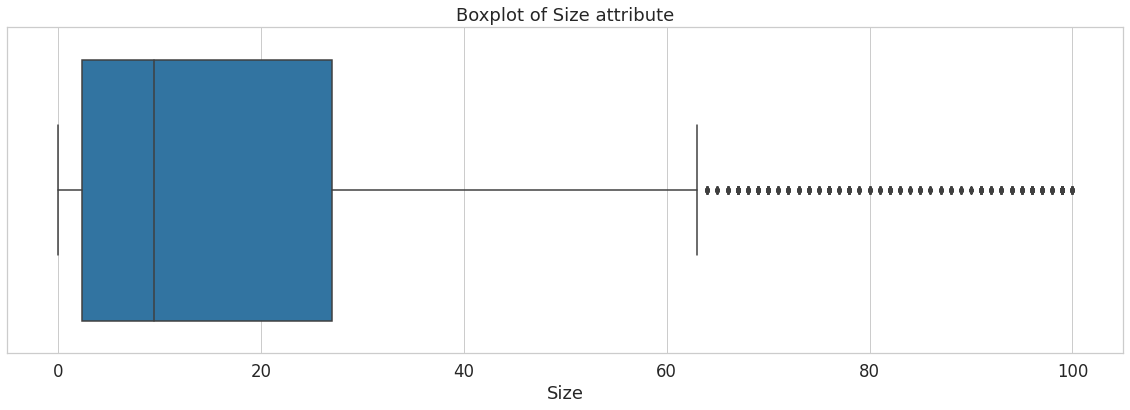

In [24]:
plt.figure(figsize = (20,6))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.5)     
sns.boxplot(data['Size']);
plt.title("Boxplot of Size attribute");

In [86]:
data[((data['Size']>60) & (data['Rating']>3.5))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5431,virtual lover 3D,FAMILY,4.6,5195.0,64.0,100000,0,0.00,2,50,"April 18, 2018",1.3,4.1 and up
600,"iPair-Meet, Chat, Dating",DATING,4.5,182986.0,77.0,5000000,0,0.00,2,36,"August 2, 2018",5.0.8,4.1 and up
5957,iHunter BC,SPORTS,4.4,55.0,63.0,1000,1,4.49,0,99,"August 3, 2018",2.0.38,4.0.3 and up
3864,hum app,MAPS_AND_NAVIGATION,4.4,10218.0,78.0,1000000,0,0.00,0,68,"July 31, 2018",5.072.1830.2,4.2 and up
2394,e-Anatomy,MEDICAL,4.0,1545.0,74.0,100000,0,0.00,0,69,"July 30, 2018",4.8.2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158,AH-1 Viper Cobra Ops - helicopter flight simul...,GAME,3.8,1088.0,86.0,100000,0,0.00,1,0,"February 16, 2018",1.0.1,4.3 and up
5015,AE Garage,AUTO_AND_VEHICLES,4.4,64.0,66.0,1000,0,0.00,0,12,"June 27, 2017",1.0,4.1 and up
2230,ABCmouse.com,FAMILY,4.3,50887.0,91.0,5000000,0,0.00,0,41,"July 3, 2018",7.2.0,4.4 and up
1296,8fit Workouts & Meal Planner,HEALTH_AND_FITNESS,4.6,115721.0,67.0,10000000,0,0.00,0,60,"July 11, 2018",3.5.0,5.0 and up


*    Most of the apps are having size less than 30 mb
*    703 apps are having size greater than 60mb out which 538 apps have better ratings greater than 3.5

<Figure size 1440x432 with 0 Axes>

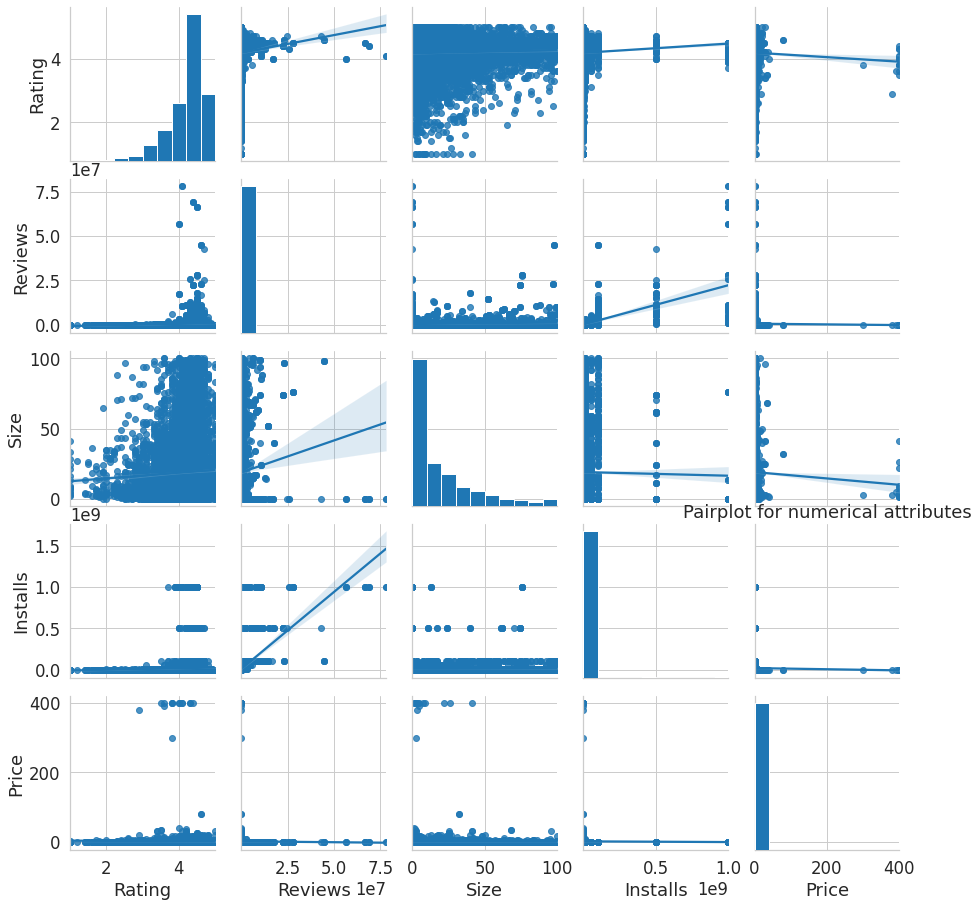

In [26]:
plt.figure(figsize = (20,6))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.5);
sns.pairplot(data[num],kind='reg');
plt.title("Pairplot for numerical attributes");

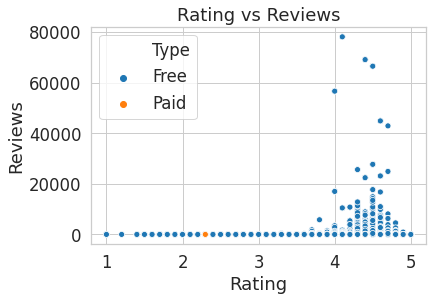

In [27]:
sns.scatterplot(y=data['Reviews']/1000,x=data['Rating'],hue=data['Type']);
plt.title("Rating vs Reviews");    ## Scatterplot

<Figure size 21600x21600 with 0 Axes>

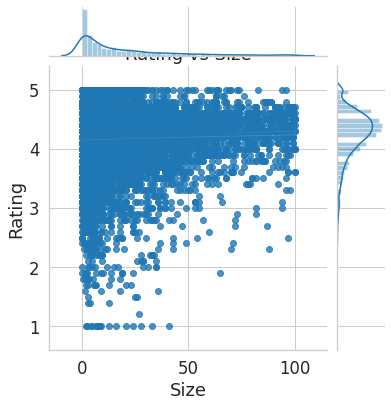

In [28]:
plt.figure(figsize = (300,300))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.5)
ax = sns.jointplot(y = data['Rating'],x= data['Size'], kind='reg');
ax.set_axis_labels(ylabel='Rating', xlabel='Size');
plt.title("Rating vs Size");

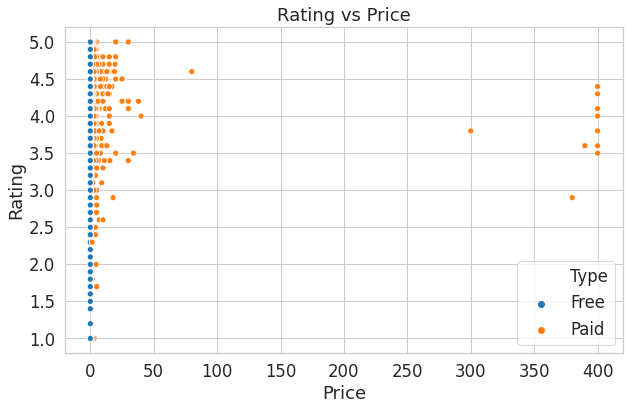

In [29]:
plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.5)
sns.scatterplot(y = data['Rating'],x=data['Price'],hue=data['Type']);
plt.title("Rating vs Price");

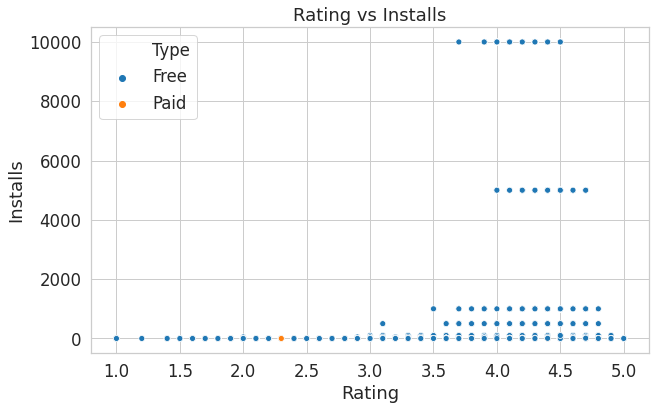

In [30]:
plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.5)
sns.scatterplot(x = data['Rating'],y=data['Installs']/100000,hue=data['Type']);
plt.title("Rating vs Installs");

1. There is slight increase in rating with increase in no of reviews.
2. Size of the app seems to be not affecting the ratings
3. Total installs of app has minor affect in increasing the ratings and increase in installs indicates the increase  in reviews.
4. Ratings are reduced with increase in price of the app.
5. Most of the app of price less than 50 dollars.

#### Grouping of data with respective to each category and average of reviews,rating and installs with each category

In [87]:
k1 = data.groupby('Category')['Reviews','Rating','Installs'].mean().sort_values(by='Rating',ascending=False)
k2 = data.groupby('Category')['Reviews','Rating','Installs'].mean().sort_values(by='Reviews',ascending=False)
k3 = data.groupby('Category')['Reviews','Rating','Installs'].mean().sort_values(by='Installs',ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
k1['all_Category']= list(k1.index)
k1

,Reviews,Rating,Installs,all_Category
Category,,,,
EVENTS,3.568667e+03,4.435556,3.544313e+05,EVENTS
ART_AND_DESIGN,2.431007e+04,4.379310,1.952209e+06,ART_AND_DESIGN
EDUCATION,5.525508e+04,4.354717,1.791057e+06,EDUCATION
BOOKS_AND_REFERENCE,9.894949e+04,4.344970,9.856755e+06,BOOKS_AND_REFERENCE
PERSONALIZATION,1.808864e+05,4.331419,5.176831e+06,PERSONALIZATION
PARENTING,1.907218e+04,4.300000,6.223222e+05,PARENTING
BEAUTY,9.407929e+03,4.278571,6.408619e+05,BEAUTY
SOCIAL,1.122838e+06,4.247291,2.703370e+07,SOCIAL
GAME,6.571406e+05,4.244605,1.496970e+07,GAME


In [89]:
def patch(ax,total):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height*100)/total),ha="center")

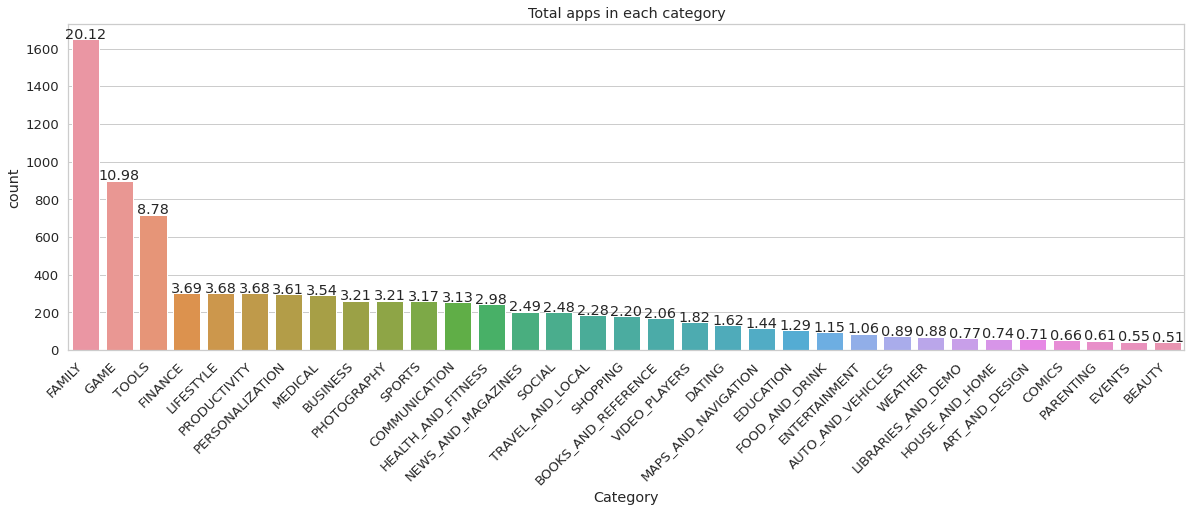

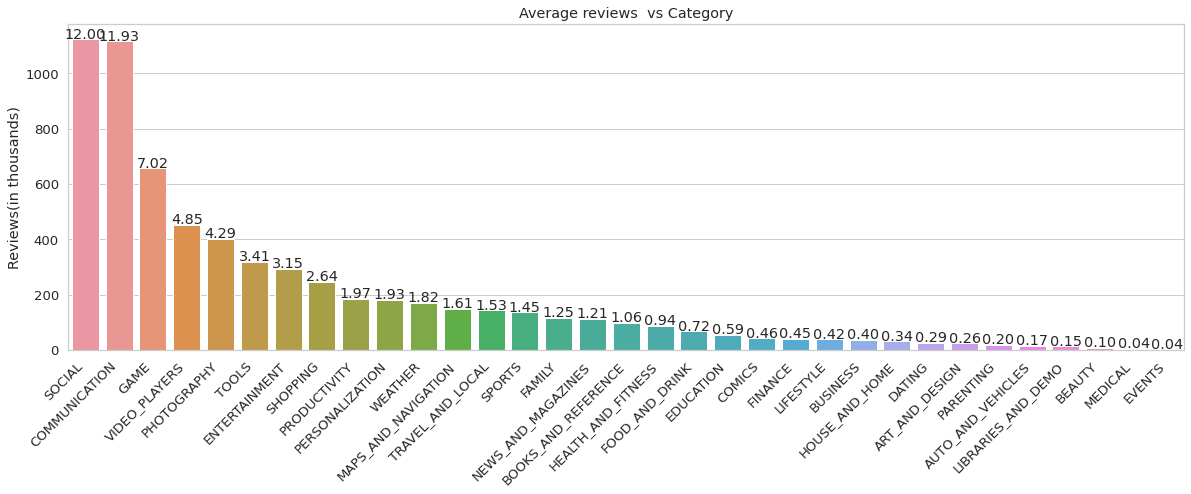

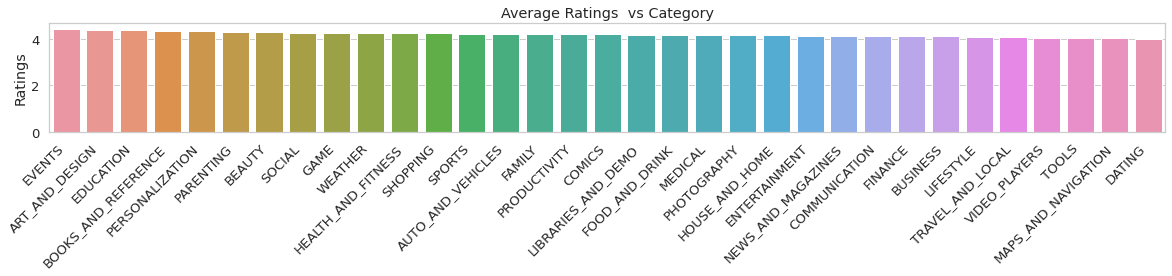

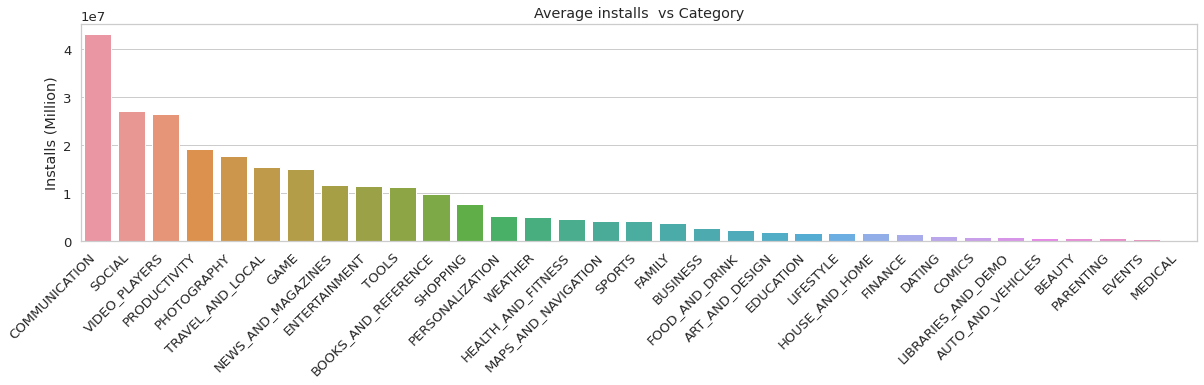

In [90]:
plt.figure(figsize = (20,6))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.2)
ax = sns.countplot(data['Category'] ,order=data['Category'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.title("Total apps in each category")
patch(ax,len(data))

plt.figure(figsize = (20,6))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.2)
ax = sns.barplot(x = list(k2.index),y=k2['Reviews']/1000)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.ylabel("Reviews(in thousands)")
plt.title("Average reviews  vs Category")
patch(ax,len(k))

plt.figure(figsize = (20,2))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.2)
ax = sns.barplot(x = list(k1.index),y=k1['Rating'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.ylabel("Ratings")
plt.title("Average Ratings  vs Category")

plt.figure(figsize = (20,4))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.2)
ax = sns.barplot(x = list(k3.index),y=k3['Installs'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.ylabel("Installs (Million)");
plt.title("Average installs  vs Category");

1. Most of the reviews are for the apps belongs to communications,social and games.
2. Average ratings are highest for apps from Events Category, but no of installs,reviews are less (Indicates less popularity)
3. Communication apps have decent ratings of above 4 and with highest avg installs, which shows these apps are very popular.

#### Unique values in content rating attributes

In [35]:
data['Content Rating'].value_counts()

Everyone           7414
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

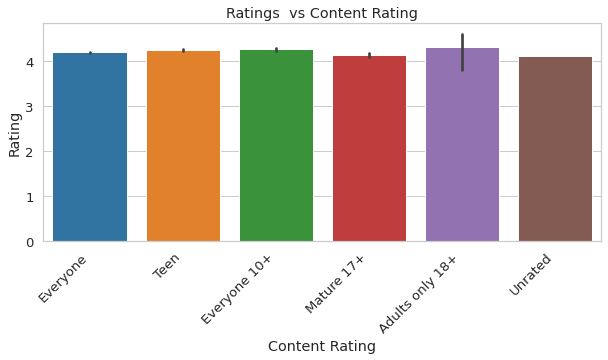

In [36]:
plt.figure(figsize = (10,4))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.2)
ax = sns.barplot(y = data['Rating'],x=data['Content Rating'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.ylabel("Rating");
plt.title("Ratings  vs Content Rating");

In [37]:
data.groupby('Content Rating')['Rating'].mean()  #### Average rating for each type of content rating 

Content Rating
Adults only 18+    4.300000
Everyone           4.186472
Everyone 10+       4.257179
Mature 17+         4.123427
Teen               4.233487
Unrated            4.100000
Name: Rating, dtype: float64

In [38]:
App_type = data.groupby('Type')['Rating','Installs','Reviews','Size'].mean()
App_type

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Rating,Installs,Reviews,Size
Type,,,,
Free,4.186288,1.922582e+07,551374.454389,18.988386
Paid,4.266822,1.130102e+05,14476.885271,18.472022


1.   Average ratings for paid are more compared to free apps as the number of free apps in the market are more and paid apps are important apps for their fuction and are less in number.
2.   Free apps are more popular(More no of installs)
3.   Reviews for free apps are more because those very much popular



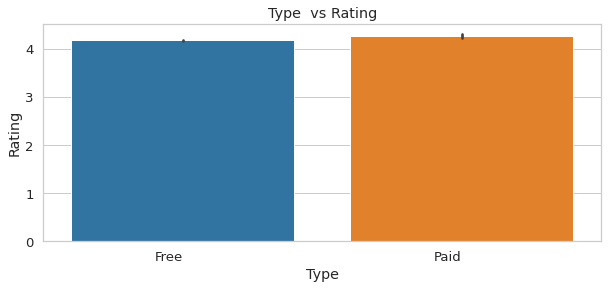

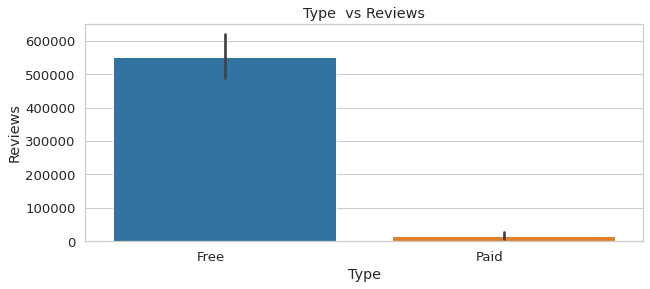

In [39]:
plt.figure(figsize = (10,4))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.2)
ax = sns.barplot(y = data['Rating'],x=data['Type'])
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right');
plt.ylabel("Rating");
plt.title("Type  vs Rating");

plt.figure(figsize = (10,4))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.2)
ax = sns.barplot(y = data['Reviews'],x=data['Type'])
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right');
plt.ylabel("Reviews");
plt.title("Type  vs Reviews");

In [40]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Labeling the type column as 0/1 for Free/Paid

In [41]:
k=[]
for i in data['Type']:
    if (i == 'Free'):
        k.append(0)
    else:
        k.append(1)
data['Type'] = k
    

In [42]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,0,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [43]:
data['Content Rating'].value_counts()

Everyone           7414
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

#### Labeling the genre according to no of app in each content rating type

In [44]:
k=[]
for i in data['Content Rating']:
    if (i ==  'Everyone'):
        k.append(0)
    elif (i == 'Teen'):
        k.append(1)
    elif (i == 'Mature 17+'):
        k.append(2)
    elif (i == 'Everyone 10+'):
        k.append(3)
    elif (i == 'Adults only 18+'):
        k.append(4)
    elif (i == 'Unrated'):
        k.append(5)
data['Content Rating']=k
    

In [45]:
data['Content Rating'].unique()

array([0, 1, 3, 2, 4, 5])

#### Label Encoding the Genres

In [46]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data['Genres'] = le.fit_transform(data['Genres'])

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   int64  
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   int64  
 9   Genres          9360 non-null   int64  
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(4), int64(4), object(5)
memory usage: 1.3+ MB


#### Checking for duplicates

In [48]:
data.duplicated().value_counts()

False    8886
True      474
dtype: int64

#### Removing the Duplicate rows

In [49]:
data.drop_duplicates(inplace=True)

Same name apps are present in the data

In [50]:
data[data["App"].duplicated()==True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804.0,0.0,5000000,0,0.0,0,20,"February 26, 2018",Varies with device,4.0.3 and up
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859.0,35.0,100000000,0,0.0,0,20,"August 2, 2018",9.7.14188,4.1 and up
294,Slack,BUSINESS,4.4,51510.0,0.0,5000000,0,0.0,0,20,"August 2, 2018",Varies with device,0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,0.0,1000000000,0,0.0,0,34,"August 1, 2018",Varies with device,0
383,imo free video calls and chat,COMMUNICATION,4.3,4785988.0,11.0,500000000,0,0.0,0,34,"June 8, 2018",9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,Motorola FM Radio,VIDEO_PLAYERS,3.9,54815.0,0.0,100000000,0,0.0,0,110,"May 2, 2018",Varies with device,0
10715,FarmersOnly Dating,DATING,3.0,1145.0,1.4,100000,0,0.0,2,36,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981.0,4.0,1000000,0,0.0,0,34,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410.0,60.0,50000,0,0.0,0,69,"March 24, 2018",2.1.0.372,4.4 and up


In [51]:
data["App"].duplicated().value_counts()

False    8190
True      696
Name: App, dtype: int64

In [52]:
data.shape

(8886, 13)

In [53]:
order_app = data.sort_values(['App', 'Reviews'], ascending=[False, False])
data = order_app.drop_duplicates(["App"])

In [54]:
data["App"].duplicated().value_counts()

False    8190
Name: App, dtype: int64

In [55]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#### Dropping the irrelavent rows

In [56]:
drop_cols = ['App','Last Updated','Current Ver','Android Ver']
data2 = data.drop(drop_cols,axis=1)

In [57]:
data2.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
882,ENTERTAINMENT,4.7,11661.0,4.0,1000000,0,0.00,0,50
7559,TOOLS,4.0,19.0,3.2,10000,0,0.00,0,105
2575,SOCIAL,4.6,22098.0,18.0,1000000,0,0.00,0,98
4362,LIFESTYLE,3.8,718.0,26.0,10000,1,399.99,0,65
6420,COMICS,4.4,190.0,34.0,10000,0,0.00,0,32


In [58]:
App_data = pd.get_dummies(data2,columns=['Category'],drop_first = True)

In [59]:
App_data.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
882,4.7,11661.0,4.0,1000000,0,0.00,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7559,4.0,19.0,3.2,10000,0,0.00,0,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2575,4.6,22098.0,18.0,1000000,0,0.00,0,98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4362,3.8,718.0,26.0,10000,1,399.99,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6420,4.4,190.0,34.0,10000,0,0.00,0,32,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
App_data.describe()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
count,8190.000000,8.190000e+03,8190.000000,8.190000e+03,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000
mean,4.173346,2.556849e+05,18.661010,9.195983e+06,0.073260,1.035902,0.312332,62.723932,0.008913,0.005128,0.020635,0.032112,0.006593,0.031258,0.016239,0.012943,0.010623,0.005495,0.201221,0.036874,0.011477,0.109768,0.029792,0.007448,0.007692,0.036752,0.014408,0.035409,0.024908,0.006105,0.036142,0.032112,0.036752,0.021978,0.024786,0.031746,0.087790,0.022833,0.018193,0.008791
std,0.536319,1.986425e+06,22.382794,5.828358e+07,0.260579,16.863402,0.729593,32.334765,0.093994,0.071432,0.142167,0.176309,0.080937,0.174024,0.126402,0.113034,0.102524,0.073926,0.400937,0.188464,0.106523,0.312619,0.170025,0.085986,0.087373,0.188164,0.119172,0.184823,0.155856,0.077900,0.186654,0.176309,0.188164,0.146621,0.155483,0.175334,0.283007,0.149379,0.133657,0.093354
min,1.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.270000e+02,2.800000,1.000000e+04,0.000000,0.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.300000,3.020000e+03,9.400000,1.000000e+05,0.000000,0.000000,0.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.500000,4.405325e+04,27.000000,1.000000e+06,0.000000,0.000000,0.000000,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,1.000000,400.000000,5.000000,114.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


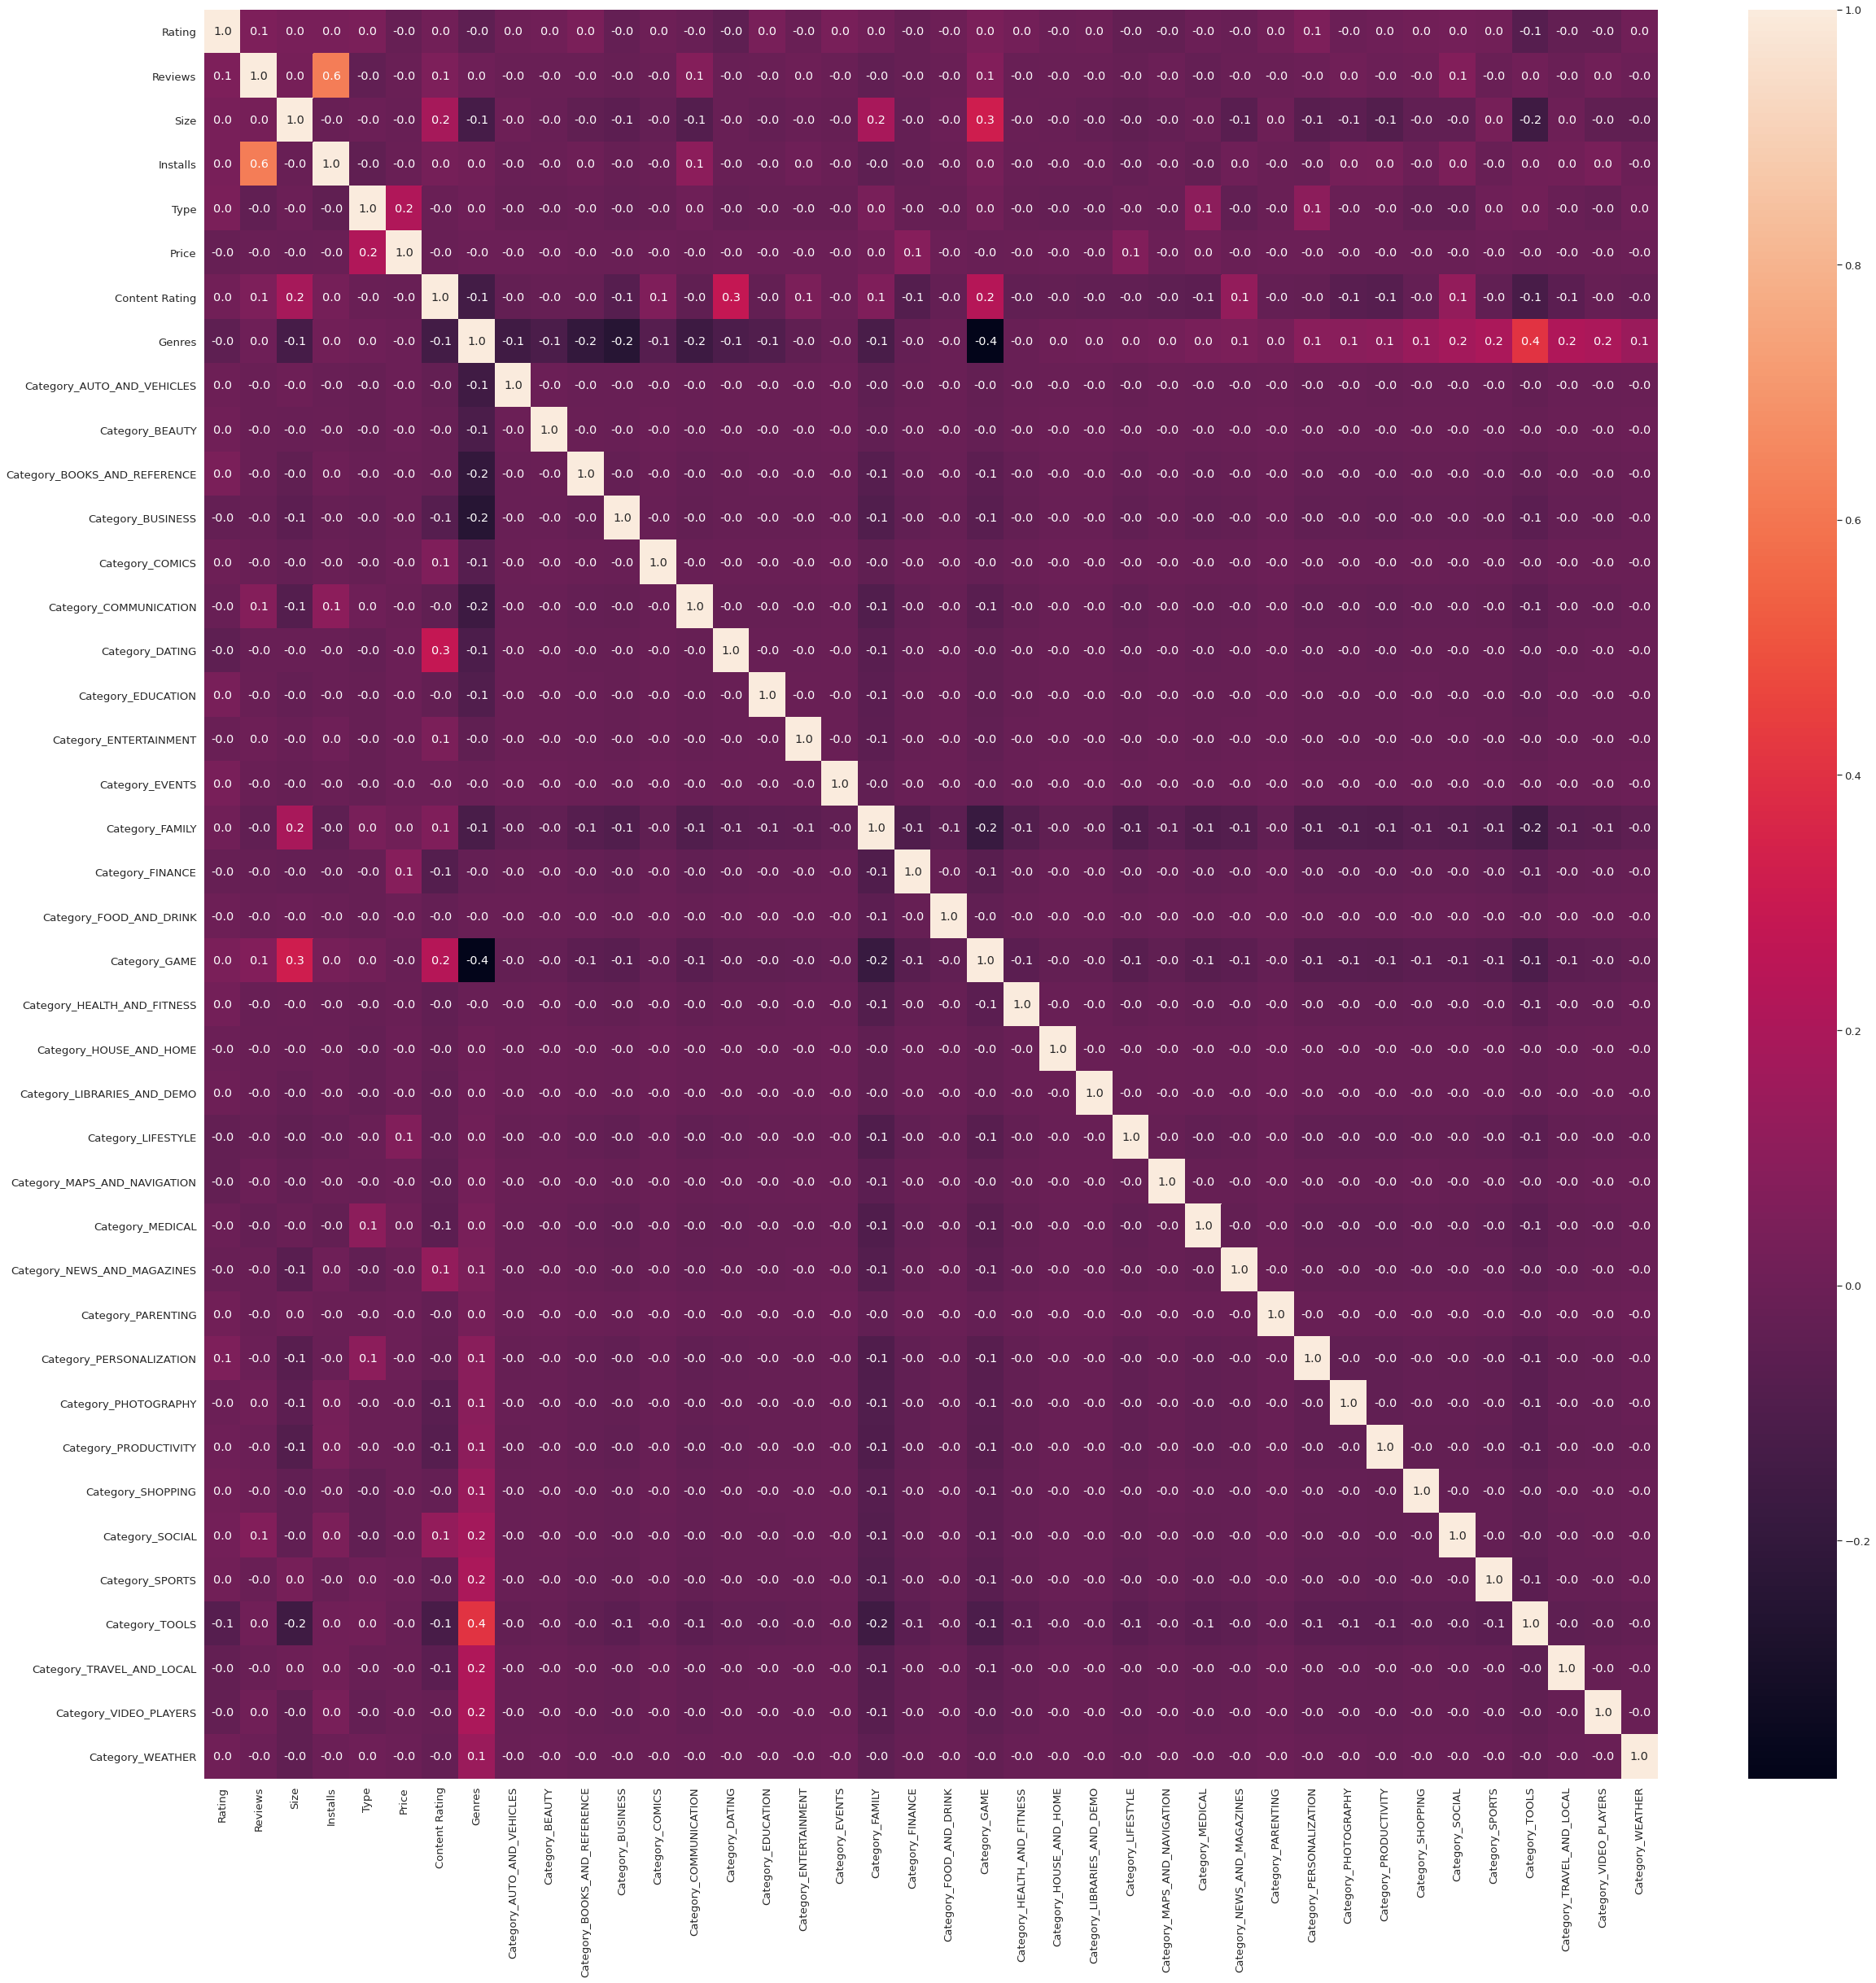

In [95]:
plt.figure(figsize=(40,40))
sns.heatmap(App_data.corr(),annot=True,fmt='.1f')
plt.show()

#### Separating input and target variables

In [61]:
x = App_data.drop('Rating',axis=1)
y = App_data['Rating']

#### Splitting the data into train and test

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=0)

#### Scaling of Data

In [63]:
scaler = MinMaxScaler()

Scaled_X_train = pd.DataFrame(scaler.fit_transform(x_train),columns=list(x.columns))
Scaled_X_test = pd.DataFrame(scaler.transform(x_test),columns=list(x.columns))

#### Model Building and Evaluation

### Linear Regression

In [64]:
reg = LinearRegression()
model = reg.fit(x_train,y_train)
y_pred = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [65]:
print("For Train data :")
print("mean absolute error :{} ".format(round(mean_absolute_error(y_train,y_pred),2)))
print("R2 score            :{} %".format(round(r2_score(y_train,y_pred)*100,2)))
print("=========================================")
print("For Test data :")
print("mean absolute error  :{} ".format(round(mean_absolute_error(y_test,y_pred_test),2)))
print("R2 score             :{} %".format(round(r2_score(y_test,y_pred_test)*100,2)))

For Train data :
mean absolute error :0.37 
R2 score            :3.73 %
For Test data :
mean absolute error  :0.39 
R2 score             :1.56 %


### Linear Regression with scaled data

In [66]:
reg = LinearRegression()
model = reg.fit(Scaled_X_train,y_train)
y_pred = model.predict(Scaled_X_train)
y_pred_test = model.predict(Scaled_X_test)

In [67]:
print("For Train data :")
print("mean absolute error :{} ".format(round(mean_absolute_error(y_train,y_pred),2)))
print("R2 score            :{} %".format(round(r2_score(y_train,y_pred)*100,2)))
print("=========================================")
print("For Test data :")
print("mean absolute error  :{} ".format(round(mean_absolute_error(y_test,y_pred_test),2)))
print("R2 score             :{} %".format(round(r2_score(y_test,y_pred_test)*100,2)))

For Train data :
mean absolute error :0.37 
R2 score            :3.73 %
For Test data :
mean absolute error  :0.39 
R2 score             :1.56 %


### KNN Regression

In [68]:
reg = KNeighborsRegressor(n_neighbors=21)
model = reg.fit(Scaled_X_train,y_train)
y_pred = model.predict(Scaled_X_train)
y_pred_test = model.predict(Scaled_X_test)

print("For Train data :")
print("mean absolute error :{} ".format(round(mean_absolute_error(y_train,y_pred),2)))
print("=========================================")
print("For Test data :")
print("mean absolute error  :{} ".format(round(mean_absolute_error(y_test,y_pred_test),2)))

For Train data :
mean absolute error :0.36 
For Test data :
mean absolute error  :0.38 


#### Support Vector Machine regression

In [69]:
reg = SVR(kernel='linear')
model = reg.fit(Scaled_X_train,y_train)
y_pred = model.predict(Scaled_X_train)
y_pred_test = model.predict(Scaled_X_test)

print("For Train data :")
print("mean absolute error :{} ".format(round(mean_absolute_error(y_train,y_pred),2)))
print("=========================================")
print("For Test data :")
print("mean absolute error  :{} ".format(round(mean_absolute_error(y_test,y_pred_test),2)))

For Train data :
mean absolute error :0.36 
For Test data :
mean absolute error  :0.37 


#### SVM with rbf kernel

In [104]:
reg = SVR(kernel='rbf')
model = reg.fit(Scaled_X_train,y_train)
y_pred = model.predict(Scaled_X_train)
y_pred_test = model.predict(Scaled_X_test)

print("For Train data :")
print("mean absolute error :{} ".format(round(mean_absolute_error(y_train,y_pred),2)))
print("=========================================")
print("For Test data :")
print("mean absolute error  :{} ".format(round(mean_absolute_error(y_test,y_pred_test),2)))

For Train data :
mean absolute error :0.35 
For Test data :
mean absolute error  :0.37 


#### Decision Tree Regressor

In [71]:
reg = DecisionTreeRegressor(random_state=0)
model = reg.fit(x_train,y_train)
y_pred = model.predict(x_train)
y_pred_test = model.predict(x_test)

print("For Train data :")
print("mean absolute error :{} ".format(round(mean_absolute_error(y_train,y_pred),2)))
print("=========================================")
print("For Test data :")
print("mean absolute error  :{} ".format(round(mean_absolute_error(y_test,y_pred_test),2)))

For Train data :
mean absolute error :0.0 
For Test data :
mean absolute error  :0.46 


In [72]:
reg = DecisionTreeRegressor(random_state=0)
model = reg.fit(Scaled_X_train,y_train)
y_pred = model.predict(Scaled_X_train)
y_pred_test = model.predict(Scaled_X_test)

print("For Train data :")
print("mean absolute error :{} ".format(round(mean_absolute_error(y_train,y_pred),2)))
print("=========================================")
print("For Test data :")
print("mean absolute error  :{} ".format(round(mean_absolute_error(y_test,y_pred_test),2)))

For Train data :
mean absolute error :0.0 
For Test data :
mean absolute error  :0.47 


In [93]:
reg = DecisionTreeRegressor(max_depth=30,random_state=0)
model = reg.fit(x_train,y_train)
y_pred = model.predict(x_train)
y_pred_test = model.predict(x_test)

print("For Train data :")
print("mean absolute error :{} ".format(round(mean_absolute_error(y_train,y_pred),2)))
print("R2 score            :{} %".format(round(r2_score(y_train,y_pred)*100,2)))
print("=========================================")
print("For Test data :")
print("mean absolute error  :{} ".format(round(mean_absolute_error(y_test,y_pred_test),2)))
print("R2 score             :{} %".format(round(r2_score(y_test,y_pred_test)*100,2)))

For Train data :
mean absolute error :0.01 
R2 score            :99.39 %
For Test data :
mean absolute error  :0.46 
R2 score             :-52.2 %


#### Random Forest Regression

In [73]:
reg = RandomForestRegressor(random_state=0)
model = reg.fit(x_train,y_train)
y_pred = model.predict(x_train)
y_pred_test = model.predict(x_test)

print("For Train data :")
print("mean absolute error :{} ".format(round(mean_absolute_error(y_train,y_pred),2)))
print("=========================================")
print("For Test data :")
print("mean absolute error  :{} ".format(round(mean_absolute_error(y_test,y_pred_test),2)))

For Train data :
mean absolute error :0.13 
For Test data :
mean absolute error  :0.36 


In [74]:
reg = RandomForestRegressor(random_state=0)
model = reg.fit(Scaled_X_train,y_train)
y_pred = model.predict(Scaled_X_train)
y_pred_test = model.predict(Scaled_X_test)

print("For Train data :")
print("mean absolute error :{} ".format(round(mean_absolute_error(y_train,y_pred),2)))
print("=========================================")
print("For Test data :")
print("mean absolute error  :{} ".format(round(mean_absolute_error(y_test,y_pred_test),2)))

For Train data :
mean absolute error :0.13 
For Test data :
mean absolute error  :0.36 


In [106]:
reg = RandomForestRegressor(max_depth=40,random_state=0)
model = reg.fit(x,y)
y_pred = model.predict(x)
##y_pred_test = model.predict(Scaled_X_test)

print("For Train data :")
print("mean absolute error :{} ".format(round(mean_absolute_error(y,y_pred),2)))
print("R2 score            :{} %".format(round(r2_score(y,y_pred)*100,2)))
print("=========================================")
print("For Test data :")
print("mean absolute error  :{} ".format(round(mean_absolute_error(y_test,y_pred_test),2)))
print("R2 score             :{} %".format(round(r2_score(y_test,y_pred_test)*100,2)))


For Train data :
mean absolute error :0.13 
R2 score            :87.22 %
For Test data :
mean absolute error  :0.37 
R2 score             :-2.74 %


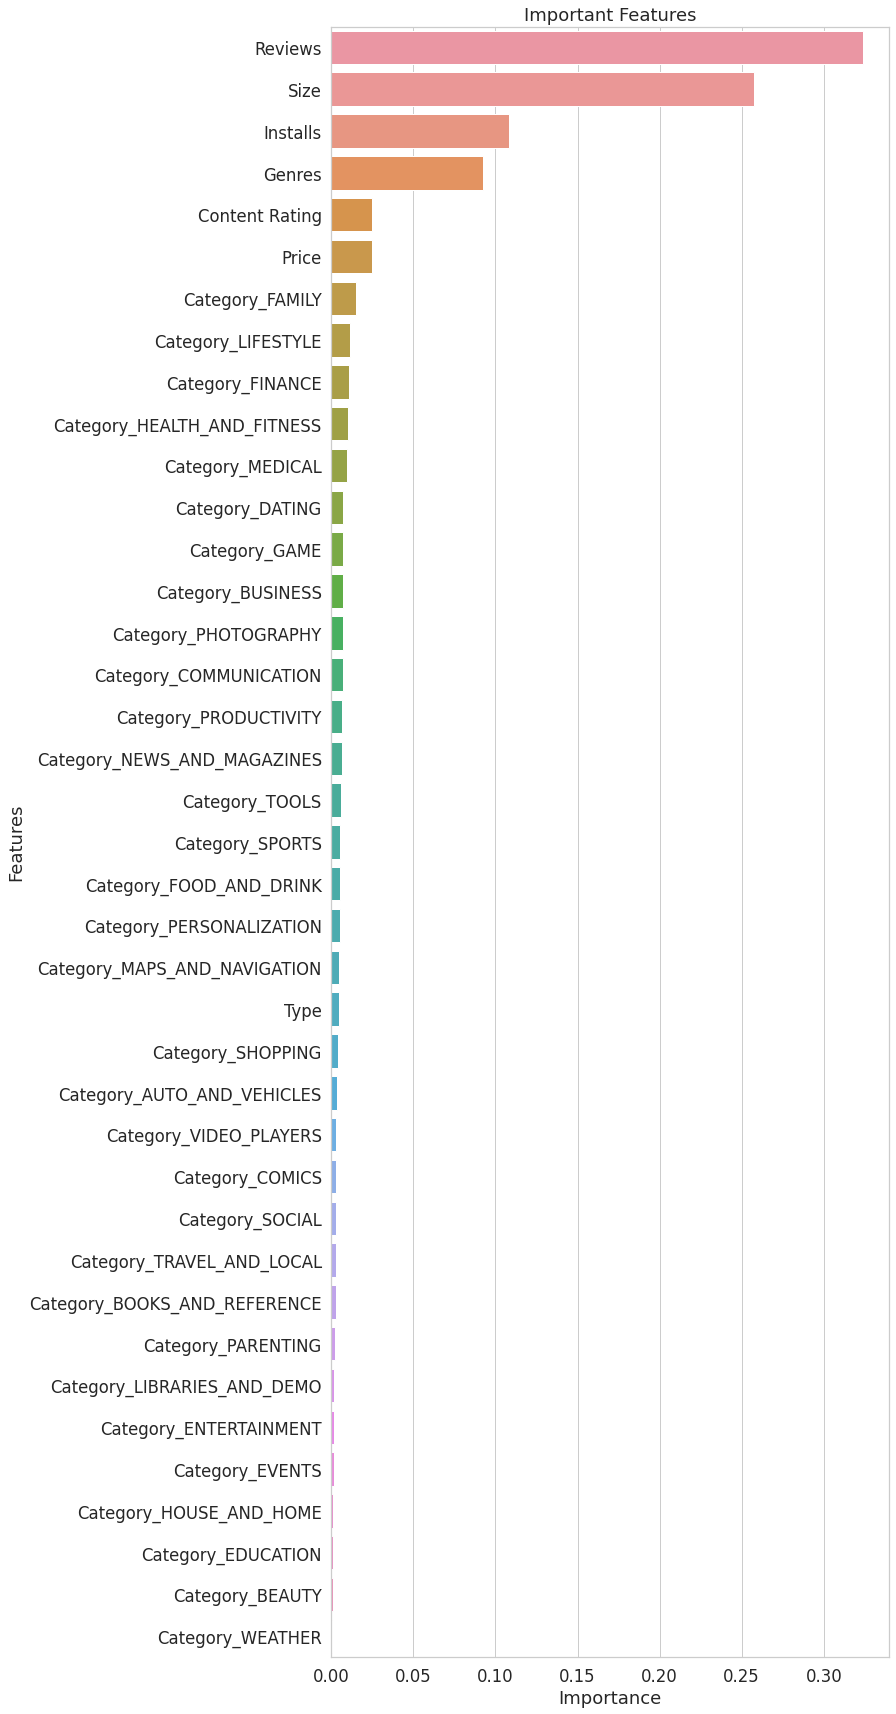

In [107]:
Feature_importance = pd.DataFrame({"Features":x_train.columns,"Importance":model.feature_importances_})
Feature_importance.sort_values(by=['Importance'],ascending=False,inplace=True)


plt.figure(figsize = (10,30))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.5)
ax = sns.barplot(x='Importance',y='Features',data = Feature_importance);
ax.set_title("Important Features");